## Import libraries

In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

## Editing image

In [3]:
image = cv2.imread('image.jpg')

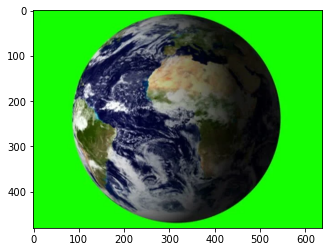

In [4]:
image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [5]:
lower_green = np.array([0, 150, 0], dtype=np.uint8)
upper_green = np.array([125, 255, 120], dtype=np.uint8) 

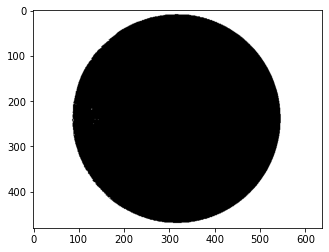

In [6]:
mask = cv2.inRange(image_copy, lower_green, upper_green)
plt.imshow(mask, cmap='gray')

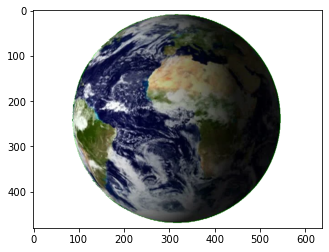

In [7]:
background_change = np.copy(image_copy)
background_change[mask != 0] = [255, 255, 255]
plt.imshow(background_change)

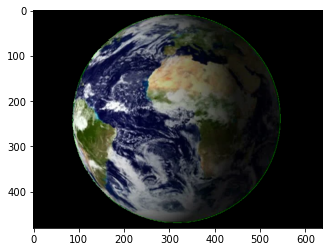

In [8]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

In [9]:
background_image = cv2.imread('background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

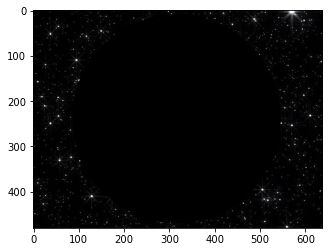

In [10]:
crop_background = background_image[0:480, 0:638]
crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)

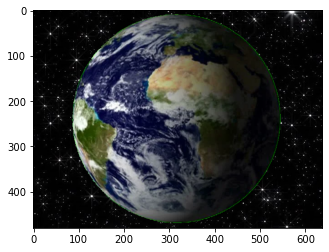

In [11]:
final_image = cv2.add(masked_image,crop_background)
plt.imshow(final_image)

## Editing video

In [14]:
video = cv2.VideoCapture("video.mp4")
background_image = cv2.imread('background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
crop_background = background_image[0:480, 0:640]

In [15]:
while True:
    ret, frame = video.read()
    frame = cv2.resize(frame, (640,480))
    
    lower_green = np.array([0, 150, 0], dtype=np.uint8)
    upper_green = np.array([125, 255, 120], dtype=np.uint8) 
    
    mask = cv2.inRange(frame, lower_green, upper_green)
    
    crop_background[mask == 0] = [0, 0, 0]
    frame[mask != 0] = [0,0,0]
    final_image = cv2.add(frame,crop_background)
    
    cv2.imshow("output", final_image)
    
    if cv2.waitKey(25) == 27:
        break

video.release()
cv2.destroyAllWindows()

Package                            Version             Location
---------------------------------- ------------------- -------------------------------------------------
absl-py                            0.10.0
alabaster                          0.7.12
alembic                            1.5.8
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
apipkg                             1.5
appdirs                            1.4.4
argh                               0.26.2
asgiref                            3.3.4
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0
astunparse                         1.6.3
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.